In [74]:
import numpy as np
import pandas as pd
import main

rigis = pd.read_csv(main.data_dir + "\\rigis.csv", delimiter=';')
del rigis['Пласт РИГИС']
del rigis['Пластпропласт']
del rigis['Литология']
del rigis['Коллектор']

rigis = rigis.rename(columns={'Скважина': 'well_name'})
rigis = rigis.rename(columns={'Абсолютная глубина': 'z_abs'})
rigis = rigis.rename(columns={'Абсолютная толщина': 'h_abs'})
rigis = rigis.rename(columns={'Глубина кровли пласта': 'z'})
rigis = rigis.rename(columns={'Толщина': 'h'})

rigis.head()

,well_name,z,h,z_abs,h_abs
0,334,2 748.60,1.0,2 530.41,1.0
1,334,2 749.60,1.2,2 531.41,1.2
2,334,2 750.80,0.4,2 532.61,0.4
3,358,2 677.60,0.6,2 532.72,0.6
4,334,2 751.20,0.4,2 533.01,0.4


In [75]:
rigis.replace(' ', '', regex=True, inplace=True)
rigis['z_abs'] = rigis['z_abs'].astype('float64')
rigis['h_abs'] = rigis['h_abs'].astype('float64')
rigis['z'] = rigis['z'].astype('float64')
rigis['h'] = rigis['h'].astype('float64')
rigis.head()

,well_name,z,h,z_abs,h_abs
0,334,2748.6,1.0,2530.41,1.0
1,334,2749.6,1.2,2531.41,1.2
2,334,2750.8,0.4,2532.61,0.4
3,358,2677.6,0.6,2532.72,0.6
4,334,2751.2,0.4,2533.01,0.4


In [76]:
coord_data = pd.read_csv(main.data_dir + "\coord.csv", delimiter=';')
coord_data = coord_data.rename(columns={'num': 'well_name'})
coord_data = coord_data.rename(columns={'x': 'X-Coord'})
coord_data = coord_data.rename(columns={'y': 'Y-Coord'})
del coord_data['well']
del coord_data['field']
del coord_data['z']
del coord_data['plastorig']
coord_data.info()
coord_data

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 0: invalid continuation byte

In [46]:
#coord_data[coord_data['well_name'] == '296R']
#coord_data = coord_data.drop(coord_data[coord_data['well_name'] == '296R'].index)

In [63]:
coord_data.replace(' ', '', regex=True, inplace=True)
coord_data['X-Coord'] = coord_data['X-Coord'].astype('float64')
coord_data['Y-Coord'] = coord_data['Y-Coord'].astype('float64')
coord_data.info()
header_data = coord_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 3 columns):
well_name    260 non-null object
X-Coord      260 non-null float64
Y-Coord      260 non-null float64
dtypes: float64(2), object(1)
memory usage: 6.2+ KB


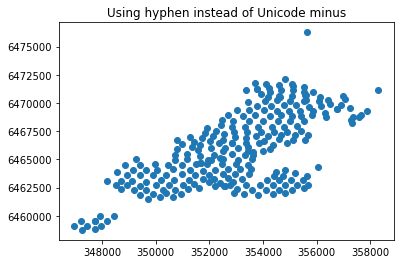

In [64]:
x_arr = coord_data['X-Coord']
y_arr = coord_data['Y-Coord']
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.plot(x_arr, y_arr, 'o')
ax.set_title('Using hyphen instead of Unicode minus')
plt.show()

In [3]:
# header_data = pd.read_csv(main.data_dir + "\Well_Header.csv", delimiter='\t')
# header_data.head()
# header_data = header_data.rename(columns={'WellName': 'well_name'})
# del header_data['KB']
# del header_data['TopDepth']
# del header_data['BottomDepth']
# del header_data['Symbol']
# del header_data['Rig']
# del header_data['Field']
# header_data.head()
# header_data['well_name'].replace('314_', '', regex=True, inplace=True)
# header_data.replace(' ', '', regex=True, inplace=True)
# header_data['X-Coord'] = header_data['X-Coord'].astype('float64')
# header_data['Y-Coord'] = header_data['Y-Coord'].astype('float64')
# header_data.head()

,well_name,X-Coord,Y-Coord
0,314_103ST2,354719.52,6470051.42
1,314_107,354693.18,6470164.36
2,314_121,354433.25,6468384.38
3,314_125PL,354717.25,6470061.16
4,314_134,354478.44,6468306.61


In [65]:
rigis = pd.merge(rigis, header_data, on='well_name')
rigis.head()

,well_name,z,h,z_abs,h_abs,X-Coord,Y-Coord
0,334,2748.6,1.0,2530.41,1.0,351177.11,6465019.99
1,334,2749.6,1.2,2531.41,1.2,351177.11,6465019.99
2,334,2750.8,0.4,2532.61,0.4,351177.11,6465019.99
3,334,2751.2,0.4,2533.01,0.4,351177.11,6465019.99
4,334,2751.6,1.0,2533.41,1.0,351177.11,6465019.99


In [66]:
top = rigis.groupby(['well_name'])['z'].min()

In [67]:
top_df =  top.to_frame().reset_index()
top_df.head()

,well_name,z
0,100,2709.4
1,101,3156.4
2,102,2792.8
3,103,2895.0
4,103ST2,2888.4


In [68]:
top_df = pd.merge(top_df, header_data, on='well_name')
top_df.head()
top_df.shape

(233, 4)

In [69]:
top_df.head()

,well_name,z,X-Coord,Y-Coord
0,100,2709.4,355010.66,6470170.74
1,101,3156.4,354605.75,6471639.69
2,102,2792.8,355094.59,6470636.37
3,103,2895.0,354278.80,6470942.75
4,103ST2,2888.4,354089.59,6470137.60


In [70]:
top_df.to_csv('top_df.csv', sep =';', columns = ['well_name', 'X-Coord', 'Y-Coord', 'z'], index = False, header =False,
             line_terminator = ';\n')

In [71]:
botom = rigis.groupby(['well_name'])['z'].max()
botom_df =  botom.to_frame().reset_index()
botom_df.head()

,well_name,z
0,100,2724.2
1,101,3170.8
2,102,2805.0
3,103,2910.0
4,103ST2,2905.6


In [72]:
rigis_h = rigis[['well_name', 'z', 'h']]
botom_df =  pd.merge(botom_df, rigis_h, on=['well_name', 'z'])
botom_df.head()

,well_name,z,h
0,100,2724.2,1.2
1,101,3170.8,1.2
2,102,2805.0,1.6
3,103,2910.0,1.6
4,103ST2,2905.6,3.0


In [73]:
botom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 0 to 232
Data columns (total 3 columns):
well_name    233 non-null object
z            233 non-null float64
h            233 non-null float64
dtypes: float64(2), object(1)
memory usage: 7.3+ KB


In [23]:
botom_df['z'] = botom_df['z'] + botom_df['h']

In [24]:
del botom_df['h']
botom_df.head()

,well_name,z
0,100,2725.4
1,101,3172.0
2,102,2806.6
3,103,2911.6
4,103ST2,2908.6


In [25]:
botom_df = pd.merge(botom_df, header_data, on='well_name')
botom_df.head()
# bottom_df.shape

,well_name,z,X-Coord,Y-Coord
0,100,2725.4,355010.66,6470170.74
1,101,3172.0,354605.75,6471639.69
2,102,2806.6,355094.59,6470636.37
3,103,2911.6,354278.80,6470942.75
4,103ST2,2908.6,354089.59,6470137.60


In [26]:
botom_df.to_csv('bottom_df.csv', sep =';', columns = ['well_name', 'X-Coord', 'Y-Coord', 'z'], index = False, header =False,
             line_terminator = ';\n')